In [1]:
# Tratamiento de datos
# -----------------------------------------------------------------------
import numpy as np
import pandas as pd

# Otros objetivos
# -----------------------------------------------------------------------
import math

# Gráficos
# -----------------------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt
import sys
sys.path.append("../../")
from src.SupportPreProcesamiento import (
    exploracion_dataframe,
    separarar_df,
    plot_numericas,
    plot_categoricas,
    relacion_vr_categoricas,
    relacion_vr_numericas,
    matriz_correlacion,
    detectar_outliers,
    diferencia_tras_rellenar_nulos
)

pd.set_option('display.float_format', '{:.2f}'.format)


# Imputación de nulos usando métodos avanzados estadísticos
# -----------------------------------------------------------------------
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer
from sklearn.ensemble import RandomForestRegressor

import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns',100)


In [2]:
df = pd.read_csv("../../datos/api_rent_madrid.csv",sep=";")

In [3]:
df.shape

(450, 38)

# priceByArea fuera
- no la usamos

In [4]:
df.drop(columns= "priceByArea")

,propertyCode,numPhotos,price,propertyType,operation,size,exterior,rooms,bathrooms,address,province,municipality,country,latitude,longitude,showAddress,distance,description,hasVideo,status,newDevelopment,detailedType,suggestedTexts,hasPlan,has3DTour,has360,hasStaging,superTopHighlight,topNewDevelopment,externalReference,floor,district,neighborhood,hasLift,parkingSpace,labels,newDevelopmentFinished
0,98903350,33,550.00,chalet,rent,371.00,False,6,3,Numancia de la Sagra,Toledo,Numancia de la Sagra,es,400.675.955,-38.225.891,False,40116,UGENA VILLAGE INMOBILIARIA GESTIONA en exclusi...,False,good,False,"{'typology': 'chalet', 'subTypology': 'indepen...","{'subtitle': 'Numancia de la Sagra', 'title': ...",False,False,False,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,91615378,12,750.00,flat,rent,60.00,True,1,1,"Calle de Alejandro Villegas, 23",Madrid,Madrid,es,404.646.164,-36.489.179,True,7037,LOFT DE DISEÑO. Orientación Este. Muy soleado ...,False,good,False,{'typology': 'flat'},"{'subtitle': 'Canillas, Madrid', 'title': 'Pis...",False,False,False,False,False,False,AV23,3,Hortaleza,Canillas,True,NaN,NaN,NaN
2,88363329,21,750.00,flat,rent,70.00,True,2,1,Gregorio izquierdo,Madrid,San Sebastián de los Reyes,es,405.500.865,-36.278.085,False,16145,"Estupendo piso muy iluminado, recientemente re...",True,good,False,{'typology': 'flat'},"{'subtitle': 'Centro Urbano, San Sebastián de ...",True,False,False,False,False,False,NaN,bj,Centro Urbano,NaN,False,NaN,NaN,NaN
3,98621753,28,400.00,penthouse,rent,67.00,True,2,2,Calle Madrid,Madrid,Villamanrique de Tajo,es,40.069.197,-3.241.383,False,55041,"A estrenar ático con piscina en Calle Madrid, ...",False,good,False,"{'typology': 'flat', 'subTypology': 'penthouse'}","{'subtitle': 'Villamanrique de Tajo', 'title':...",False,False,True,False,False,False,90004,2,NaN,NaN,False,NaN,NaN,NaN
4,98222714,22,450.00,flat,rent,89.00,False,2,1,Calle Arroyo,Toledo,Recas,es,400.536.974,-39.912.159,False,47186,REDPISO alquila esta vivienda situada en el mu...,False,good,False,{'typology': 'flat'},"{'subtitle': 'Recas', 'title': 'Piso en Calle ...",False,False,False,False,False,False,RP1882022101719,2,NaN,NaN,True,"{'hasParkingSpace': True, 'isParkingSpaceInclu...",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445,98815692,16,640.00,flat,rent,69.00,True,2,1,"Calle Gonzalo de Berceo, 16",Madrid,Villalbilla,es,404.371.512,-33.579.945,True,29311,•Urbanización privada •Plaza de garaje •Traste...,False,good,False,{'typology': 'flat'},"{'subtitle': 'Villalbilla', 'title': 'Piso en ...",False,False,False,False,False,False,2806/28060001/00000281,2,NaN,NaN,True,"{'hasParkingSpace': True, 'isParkingSpaceInclu...",NaN,NaN
446,97765107,19,700.00,flat,rent,54.00,True,1,1,Calle Núñez de Balboa,Madrid,Getafe,es,403.139.255,-37.303.869,False,11656,PROMOCIÓN: 1 MES DE ALQUILER GRATIS si reserva...,True,good,False,{'typology': 'flat'},"{'subtitle': 'Getafe Centro, Getafe', 'title':...",True,False,True,False,False,False,CH-95178-0001,1,Getafe Centro,NaN,True,NaN,NaN,NaN
447,98620594,16,700.00,flat,rent,59.00,True,1,1,"Calle de las Trompas, 40",Madrid,Madrid,es,403.727.138,-3.770.851,True,7529,Se alquila estupenda vivienda exterior y muy l...,False,good,False,{'typology': 'flat'},"{'subtitle': 'Pau de Carabanchel, Madrid', 'ti...",False,False,False,False,False,False,NaN,6,Carabanchel,Pau de Carabanchel,True,"{'hasParkingSpace': True, 'isParkingSpaceInclu...",NaN,NaN
448,98791417,11,700.00,flat,rent,75.00,True,2,1,"Calle Alonso Sánchez, 6",Madrid,Alcalá de Henares,es,404.909.687,-33.579.488,True,30359,Berlin SV Properties alquila estupendo piso ex...,False,good,False,{'typology': 'flat'},"{'subtitle': 'Pryconsa - Poligono Europa, Alca...",False,False,False,False,False,False,NaN,1,Pryconsa - Poligono Europa,NaN,False,NaN,NaN,NaN


# Que vamos a hacer:
- **Conocer las columnas**: Para saber que nos indican
- **Fijar la Variable Respuesta**: Ver cual es la variable a predecir
- **Eliminar duplicados:**: Antes de tocar nada, no queremos duplicados, es el único momento donde podemos hacerlo
- **Análisis exhaustivo de los datos**: Para conocer con lo que estamos trabajando
- **Fijar las Columnas categóricas**: Ver las columnas que nos otorgan precio
- **Eliminar columnas que no sean necesarias**: Para poder trabajar con los datos reducidos

In [5]:
df.sample()

,propertyCode,numPhotos,price,propertyType,operation,size,exterior,rooms,bathrooms,address,province,municipality,country,latitude,longitude,showAddress,distance,description,hasVideo,status,newDevelopment,priceByArea,detailedType,suggestedTexts,hasPlan,has3DTour,has360,hasStaging,superTopHighlight,topNewDevelopment,externalReference,floor,district,neighborhood,hasLift,parkingSpace,labels,newDevelopmentFinished
389,82028809,15,700.00,flat,rent,80.00,True,3,1,"Calle Huesca, 10",Madrid,Móstoles,es,403.193.269,-38.696.862,True,17777,"Se alquila fantástica vivienda exterior, muy l...",False,good,False,9.00,{'typology': 'flat'},"{'subtitle': 'Suroeste, Móstoles', 'title': 'P...",False,False,False,False,False,False,NaN,5,Suroeste,NaN,True,NaN,NaN,NaN


In [6]:
for col in df.columns:
    #print(f"- **{col}**:") # Imprimir columnas para markdown
    pass

 #  Conocer Columnas
- **propertyCode**: Código único de la propiedad
- **numPhotos**: número de fotos del apartamento
- **price**: Precio en euros **Variable Respuesta**
- **propertyType**: Tipo de propiedad
- **operation**: Tipo de operación (rent)
- **size**: Tamaño en m2
- **exterior**: Booleano si es exterior
- **rooms**: numero de habitacioens
- **bathrooms**: numero de baños
- **address**: Dirección aprxo de la propiedad
- **province**: Provincia
- **municipality**: Municipio
- **country**: País
- **latitude**: Latitud
- **longitude**: Longitud
- **showAddress**: Bool para mostrar dirección
- **distance**: distancia al centro en metros
- **description**: descripción
- **hasVideo**: Bool si se le saco vídeo
- **status**: 
- **newDevelopment**: Bool que indica si es nueva construcción
- **priceByArea**: Precio por m2 en €
- **detailedType**: 
- **suggestedTexts**: 
- **hasPlan**:
- **has3DTour**: Indica si tiene tour disponible
- **has360**: Indica si tiene video 360
- **hasStaging**:
- **superTopHighlight**: Bool de si estña destacada
- **topNewDevelopment**:bool de si está destacado la nueva construcción
- **externalReference**:
- **floor**: Piso de la propiedad
- **district**: Distrito
- **neighborhood**: Barrio dentro del distrito
- **hasLift**: Indica si la propiedad tiene ascensor
- **parkingSpace**: Indica info estacionamiento
- **labels**: 
- **newDevelopmentFinished**:

# Muchas columnas
- Veamos que son las que no sabemos que son

In [7]:
df["newDevelopmentFinished"].value_counts()

newDevelopmentFinished
True     12
False     5
Name: count, dtype: int64

In [8]:
df["labels"].value_counts()

labels
[{'name': 'apartamentoType', 'text': 'Apartamento'}]    30
Name: count, dtype: int64

In [9]:
df["externalReference"].value_counts().reset_index().sample()

,externalReference,count
126,627456,1


In [10]:
df["hasStaging"].value_counts()

hasStaging
False    432
Name: count, dtype: int64

In [11]:
df["detailedType"].value_counts()

detailedType
{'typology': 'flat'}                                           344
{'typology': 'flat', 'subTypology': 'studio'}                   46
{'typology': 'flat', 'subTypology': 'penthouse'}                16
{'typology': 'flat', 'subTypology': 'duplex'}                   15
{'typology': 'chalet', 'subTypology': 'terracedHouse'}           5
{'typology': 'chalet', 'subTypology': 'independantHouse'}        2
{'typology': 'chalet'}                                           1
{'typology': 'countryHouse', 'subTypology': 'countryHouse'}      1
{'typology': 'chalet', 'subTypology': 'semidetachedHouse'}       1
{'typology': 'countryHouse', 'subTypology': 'casaDePueblo'}      1
Name: count, dtype: int64

In [12]:
df["suggestedTexts"].value_counts()

suggestedTexts
{'subtitle': 'Suroeste, Torrejón de Ardoz', 'title': 'Piso en Calle Valle de Ambles, 2'}            10
{'subtitle': 'El Quiñón, Seseña', 'title': 'Piso'}                                                   4
{'subtitle': 'Los Rosales, Madrid', 'title': 'Piso en Calle de Sáhara'}                              3
{'subtitle': 'Las Sedas - El Olivar, Alcalá de Henares', 'title': 'Piso en Calle de Honduras'}       3
{'subtitle': 'Cabañas de la Sagra', 'title': 'Piso'}                                                 2
                                                                                                    ..
{'subtitle': 'Rascafría', 'title': 'Piso'}                                                           1
{'subtitle': 'Cedillo del Condado', 'title': 'Piso en Calle Arena'}                                  1
{'subtitle': 'Recas', 'title': 'Piso en Calle Arroyo'}                                               1
{'subtitle': 'Villamanrique de Tajo', 'title': 'Ático en C

In [13]:
df["hasPlan"].value_counts()

hasPlan
False    296
True     136
Name: count, dtype: int64

In [14]:
df["status"].value_counts()

status
good              413
newdevelopment     17
renew               2
Name: count, dtype: int64

- **newDevelopmentFinished**: Describe si se ha terminado la obra
- **labels**: Tipo apartamento, parece que siempre es "Apartamento" 
- **externalReference**: Código de referencia del piso 335 (únicos)
- **hasStaging**: No se que es, pero siempre es Falso
- **detailedType**: Tipo de vivienda detallada
- **suggestedTexts**: Título y Subtítulo Recomendados para la vivienda
- **hasPlan**: Bool, dice si la casa tiene los planos
- **status**: Estado de la casa (Bueno, nuevo, reformada)

# Ya conocemos las columnas, vamos ahora a eliminar duplicados

In [15]:
df.duplicated().sum()

np.int64(8)

In [16]:
df.drop_duplicates(inplace=True)

# Selección inicial de columnas
Vamos a seleccionar las columnas que pueden aportarnos valor al precio, son las siguientes:
- price: Es la variable Respuesta
- propertyType: Tipo Propiedad
- operation
- size: Tamaño en m2
- exterior: Bool, dice si es exterior
- rooms
- bathrooms
- address
- province
- municipality
- country
- latitude
- longitude
- distance
- status
- priceByArea
- hasPlan
- has3DTour
- has360
- superTopHighlight
- topNewDevelopment
- floor
- district
- neighborhood
- hasLift
- parkingSpace
- newDevelopmentFinished


In [17]:
df.columns

Index(['propertyCode', 'numPhotos', 'price', 'propertyType', 'operation',
       'size', 'exterior', 'rooms', 'bathrooms', 'address', 'province',
       'municipality', 'country', 'latitude', 'longitude', 'showAddress',
       'distance', 'description', 'hasVideo', 'status', 'newDevelopment',
       'priceByArea', 'detailedType', 'suggestedTexts', 'hasPlan', 'has3DTour',
       'has360', 'hasStaging', 'superTopHighlight', 'topNewDevelopment',
       'externalReference', 'floor', 'district', 'neighborhood', 'hasLift',
       'parkingSpace', 'labels', 'newDevelopmentFinished'],
      dtype='object')

In [18]:
cols = ["price","propertyType","operation","size","exterior","rooms","bathrooms",
        "address","province","municipality","country","latitude","longitude","distance",
        "status","hasPlan","has3DTour","has360","superTopHighlight",
        "topNewDevelopment","floor","district","neighborhood","hasLift","parkingSpace",
        "newDevelopmentFinished"]
df = df[cols]

In [19]:
df.sample()

,price,propertyType,operation,size,exterior,rooms,bathrooms,address,province,municipality,country,latitude,longitude,distance,status,hasPlan,has3DTour,has360,superTopHighlight,topNewDevelopment,floor,district,neighborhood,hasLift,parkingSpace,newDevelopmentFinished
12,700.00,studio,rent,28.00,True,0,1,"Calle de Juan Pérez Zúñiga, 41",Madrid,Madrid,es,404.436.001,-36.477.389,5569,good,True,True,False,False,False,1,Ciudad Lineal,San Pascual,False,NaN,NaN


# Segunda Revisión de las Columnas

In [20]:
df_cat = df.select_dtypes("O")

In [21]:
for col in df_cat.columns:
    print(f"|   Columna: {col}  |")
    print(f"No nulos: {df[col].value_counts().sum()}/{df.shape[0]}")
    print("-------------------------")
    print(f"Valores únicos:")
    print(df[col].value_counts())
    print("--------------------------------------")

|   Columna: propertyType  |
No nulos: 442/442
-------------------------
Valores únicos:
propertyType
flat            348
studio           48
duplex           19
penthouse        16
chalet            9
countryHouse      2
Name: count, dtype: int64
--------------------------------------
|   Columna: operation  |
No nulos: 442/442
-------------------------
Valores únicos:
operation
rent    442
Name: count, dtype: int64
--------------------------------------
|   Columna: address  |
No nulos: 442/442
-------------------------
Valores únicos:
address
Calle Valle de Ambles, 2             7
El Quiñón                            4
Calle de Sáhara                      3
Calle de Honduras                    3
jerez                                2
                                    ..
Calle de Ramón Esteban, 12           1
duque de medinaceli                  1
Avenida Matapiñonera, 11             1
Avenida de la Ciudad de Barcelona    1
sexta bandera                        1
Name: count, Length

# Nos quitamos columnas
No nos aportan info las siguientes
- operation: solo tiene valor "rent"
- country: solo tiene valor "es"
- ParkingSpace: Pocos datos, muchos nulos
- superTopHighlight: todo False
- topNewDevelopment: todo False
- newDevelopmentFinished: Muy pocos datos

In [22]:
cols_chao = ["operation","country","parkingSpace","superTopHighlight","topNewDevelopment","newDevelopmentFinished"]
df.drop(columns=cols_chao,inplace=True)
df.sample()


,price,propertyType,size,exterior,rooms,bathrooms,address,province,municipality,latitude,longitude,distance,status,hasPlan,has3DTour,has360,floor,district,neighborhood,hasLift
233,650.00,flat,96.00,True,2,1,Calle de San Juan,Madrid,Aranjuez,400.299.792,-3.595.984,43953,good,True,False,True,3,Nuevo Aranjuez-Ciudad de las Artes,NaN,False


In [23]:
df.shape

(442, 20)

# Reordenar DF
- Para tener un orden más legible

In [24]:
df.columns

Index(['price', 'propertyType', 'size', 'exterior', 'rooms', 'bathrooms',
       'address', 'province', 'municipality', 'latitude', 'longitude',
       'distance', 'status', 'hasPlan', 'has3DTour', 'has360', 'floor',
       'district', 'neighborhood', 'hasLift'],
      dtype='object')

In [25]:
col_order = ["propertyType",'status','price','size','rooms','bathrooms','floor',
             'neighborhood','address','district','province','municipality','exterior','hasLift',
             'hasPlan','has3DTour', 'has360','distance','latitude', 'longitude']
df = df[col_order]

# EDA inicial 

In [26]:
exploracion_dataframe(df,"price",estadisticos=False)

El número de datos es 442 y el de columnas es 20

 ..................... 

Los duplicados que tenemos en el conjunto de datos son: 1

 ..................... 

Los nulos que tenemos en el conjunto de datos son:


,%_nulos
status,4.07
floor,18.33
neighborhood,60.63
district,24.66
hasLift,7.01
hasPlan,4.07
has3DTour,4.07
has360,4.07



 ..................... 

Los tipos de las columnas son:


,tipo_dato
propertyType,object
status,object
price,float64
size,float64
rooms,int64
bathrooms,int64
floor,object
neighborhood,object
address,object
district,object



 ..................... 

Los valores que tenemos para las columnas categóricas son: 
La columna PROPERTYTYPE tiene las siguientes valore únicos:


,count
propertyType,
flat,348
studio,48
duplex,19
penthouse,16
chalet,9


La columna STATUS tiene las siguientes valore únicos:


,count
status,
good,409
newdevelopment,13
renew,2


La columna FLOOR tiene las siguientes valore únicos:


,count
floor,
1,94
2,75
bj,67
3,59
4,36


La columna NEIGHBORHOOD tiene las siguientes valore únicos:


,count
neighborhood,
Lavapiés-Embajadores,11
Villaverde Alto,9
Valdeacederas,8
San Diego,8
Los Rosales,7


La columna ADDRESS tiene las siguientes valore únicos:


,count
address,
"Calle Valle de Ambles, 2",7
El Quiñón,4
Calle de Sáhara,3
Calle de Honduras,3
jerez,2


La columna DISTRICT tiene las siguientes valore únicos:


,count
district,
Centro,48
Villaverde,23
Puente de Vallecas,17
El Quiñón,13
Tetuán,13


La columna PROVINCE tiene las siguientes valore únicos:


,count
province,
Madrid,353
Toledo,59
Guadalajara,21
Segovia,8
Ávila,1


La columna MUNICIPALITY tiene las siguientes valore únicos:


,count
municipality,
Madrid,170
Alcalá de Henares,22
Seseña,14
Parla,14
Torrejón de Ardoz,11


La columna HASLIFT tiene las siguientes valore únicos:


,count
hasLift,
True,226
False,185


La columna HASPLAN tiene las siguientes valore únicos:


,count
hasPlan,
False,293
True,131


La columna HAS3DTOUR tiene las siguientes valore únicos:


,count
has3DTour,
False,418
True,6


La columna HAS360 tiene las siguientes valore únicos:


,count
has360,
False,337
True,87


La columna LATITUDE tiene las siguientes valore únicos:


,count
latitude,
404.430.651,7
403.809.876,2
402.003.307,2
403.082.527,2
40.437.054,1


La columna LONGITUDE tiene las siguientes valore únicos:


,count
longitude,
-34.659.877,7
-36.338.528,2
-36.919.489,2
-37.365.244,2
-36.453.254,1


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 442 entries, 0 to 449
Data columns (total 20 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   propertyType  442 non-null    object 
 1   status        424 non-null    object 
 2   price         442 non-null    float64
 3   size          442 non-null    float64
 4   rooms         442 non-null    int64  
 5   bathrooms     442 non-null    int64  
 6   floor         361 non-null    object 
 7   neighborhood  174 non-null    object 
 8   address       442 non-null    object 
 9   district      333 non-null    object 
 10  province      442 non-null    object 
 11  municipality  442 non-null    object 
 12  exterior      442 non-null    bool   
 13  hasLift       411 non-null    object 
 14  hasPlan       424 non-null    object 
 15  has3DTour     424 non-null    object 
 16  has360        424 non-null    object 
 17  distance      442 non-null    int64  
 18  latitude      442 non-null    objec

# Arreglar tipos
- latitude: numeric
- Longitude: numeric
- rooms: category
- bathrooms: category

In [28]:
df["latitude"] = df["latitude"].str.replace(".","")
df["longitude"] = df["longitude"].str.replace(".","")

In [29]:

df["latitude"] = df["latitude"].astype(float)
df["longitude"] = df["longitude"].astype(float)

In [30]:
df["rooms"] = df["rooms"].astype("category")
df["bathrooms"] = df["bathrooms"].astype("category")

# Guardar DF con latitud y Longitud
- Para un posible mapa de las zonas
- pero ahora no lo necesitamos

In [31]:
df.to_csv("../../datos/01_rent_sucio_para_mapa_pisos.csv")

In [32]:
col_order = ["propertyType",'status','price','size','rooms','bathrooms','floor',
             'neighborhood','address','district','province','municipality','exterior','hasLift',
             'hasPlan','has3DTour', 'has360','distance']
df = df[col_order]

# Mostrar Gráficas Iniciales
- No les haremos mucho caso todavía, ya que hay columnas que no las necesitamos para la predicción.
- Esas columnas se usaran en el escenario ideal para realizar el mapa de los pisos seleccionados


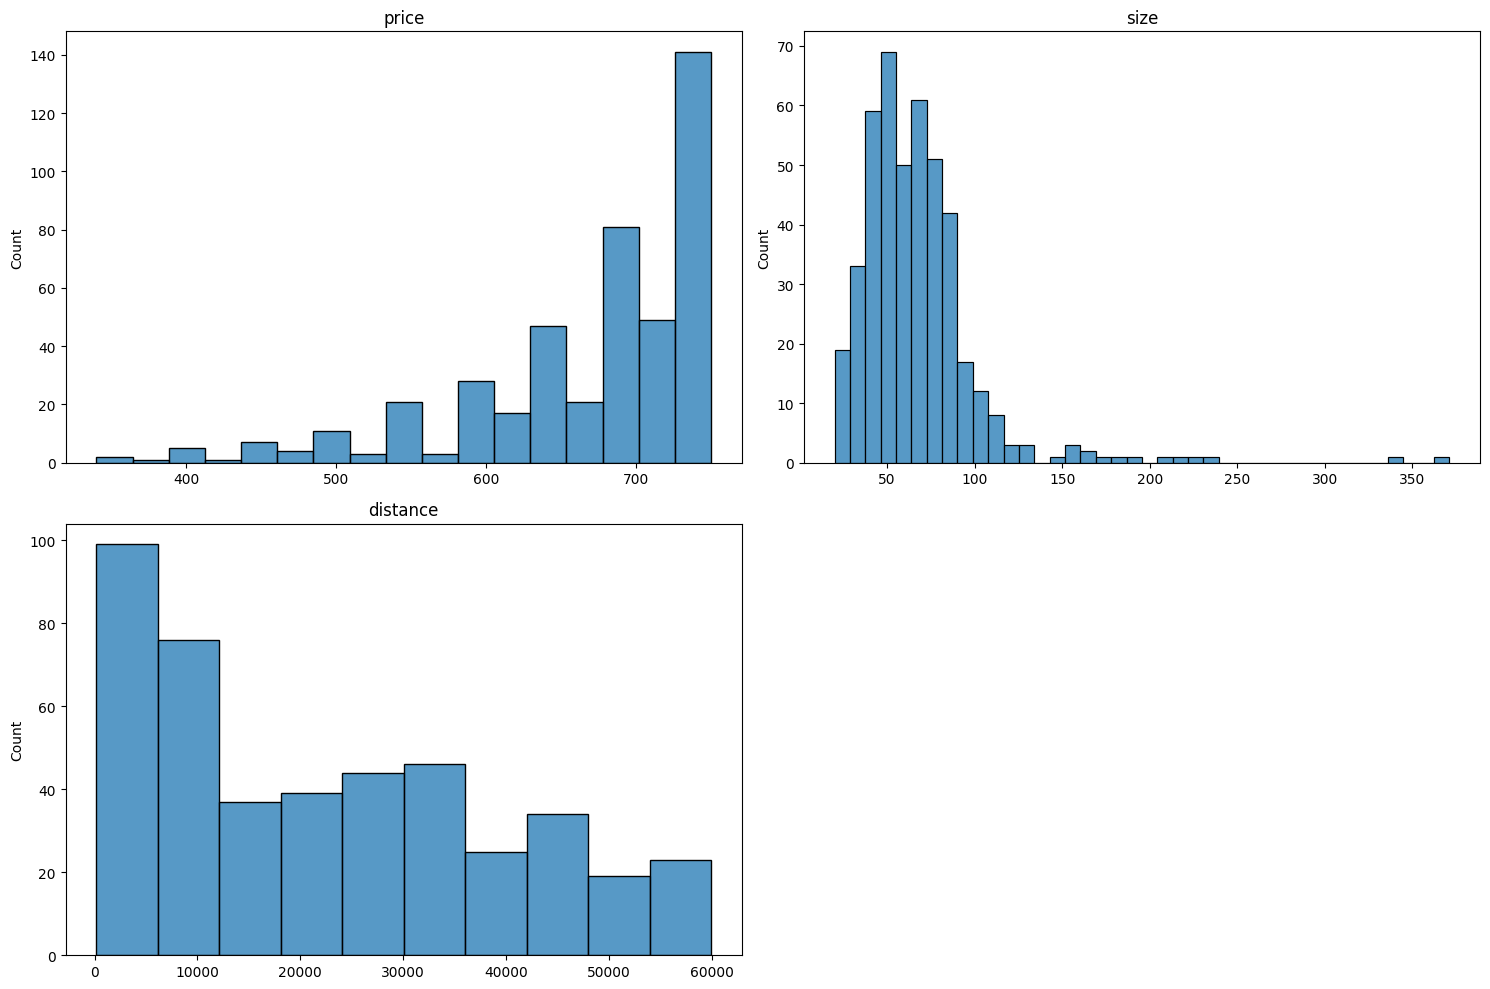

In [33]:
numericas, categoricas = separarar_df(df)
plot_numericas(numericas)

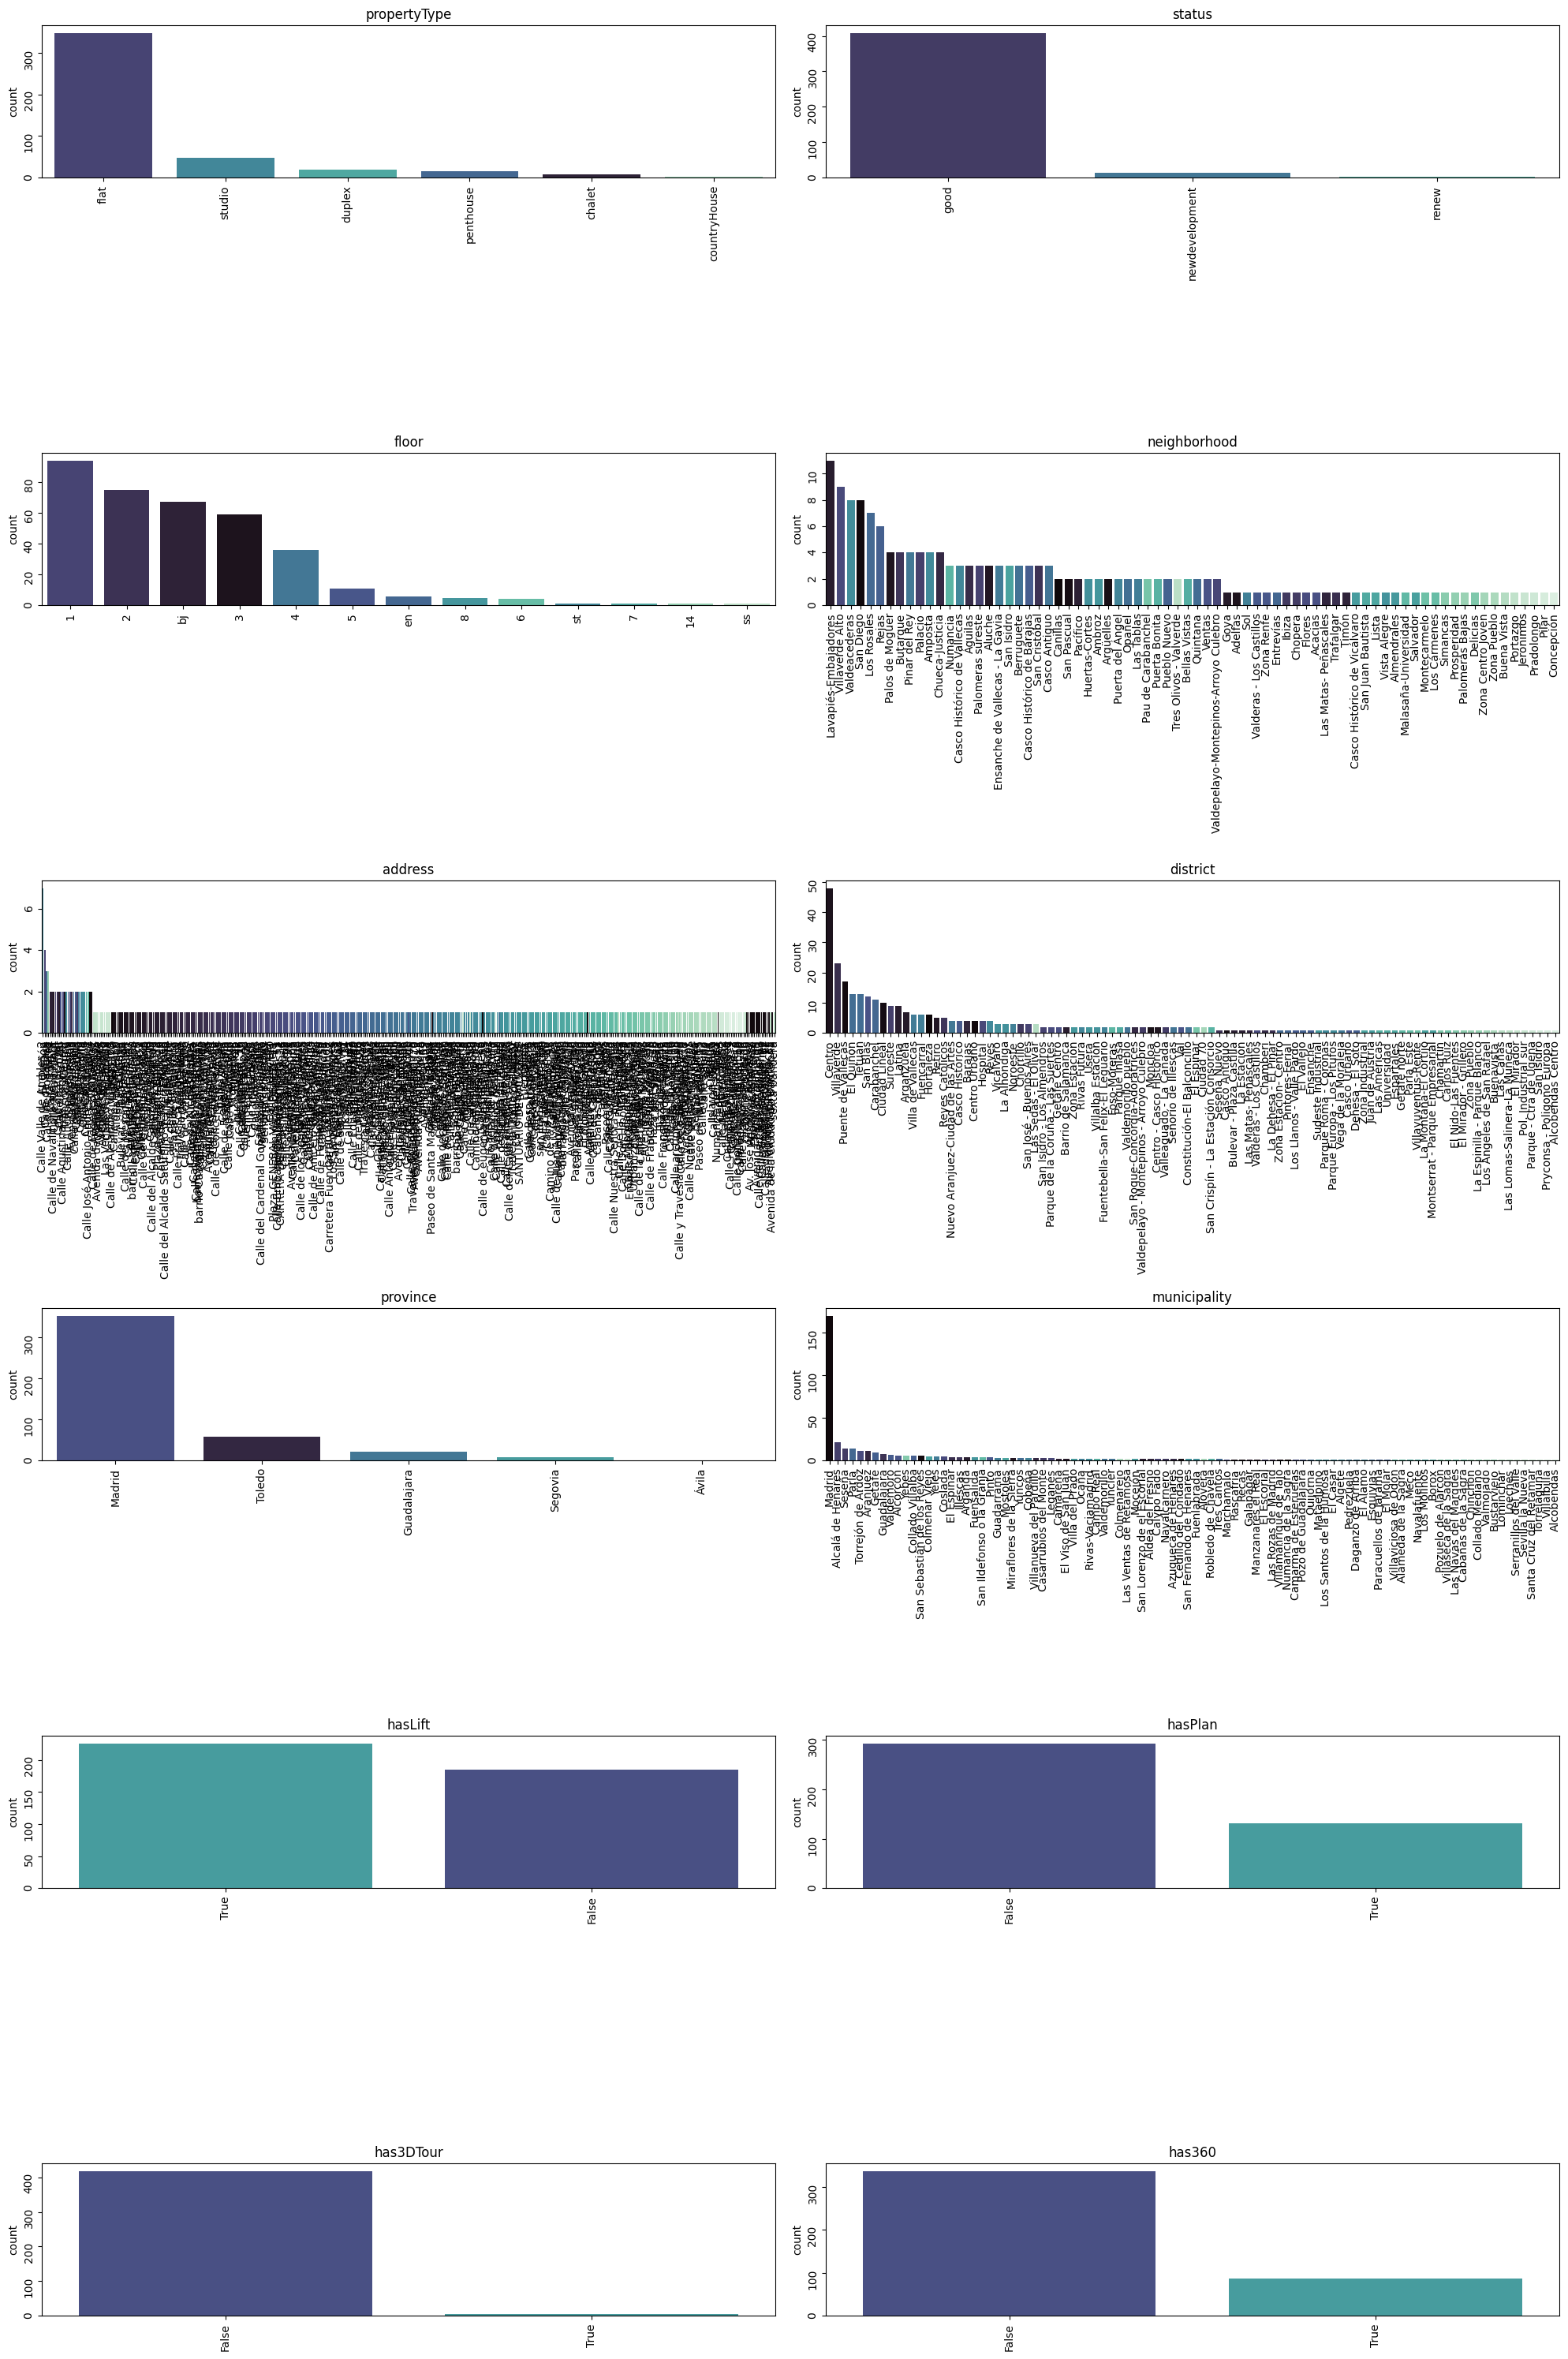

In [34]:
plot_categoricas(categoricas,grafica_size=(20,30))

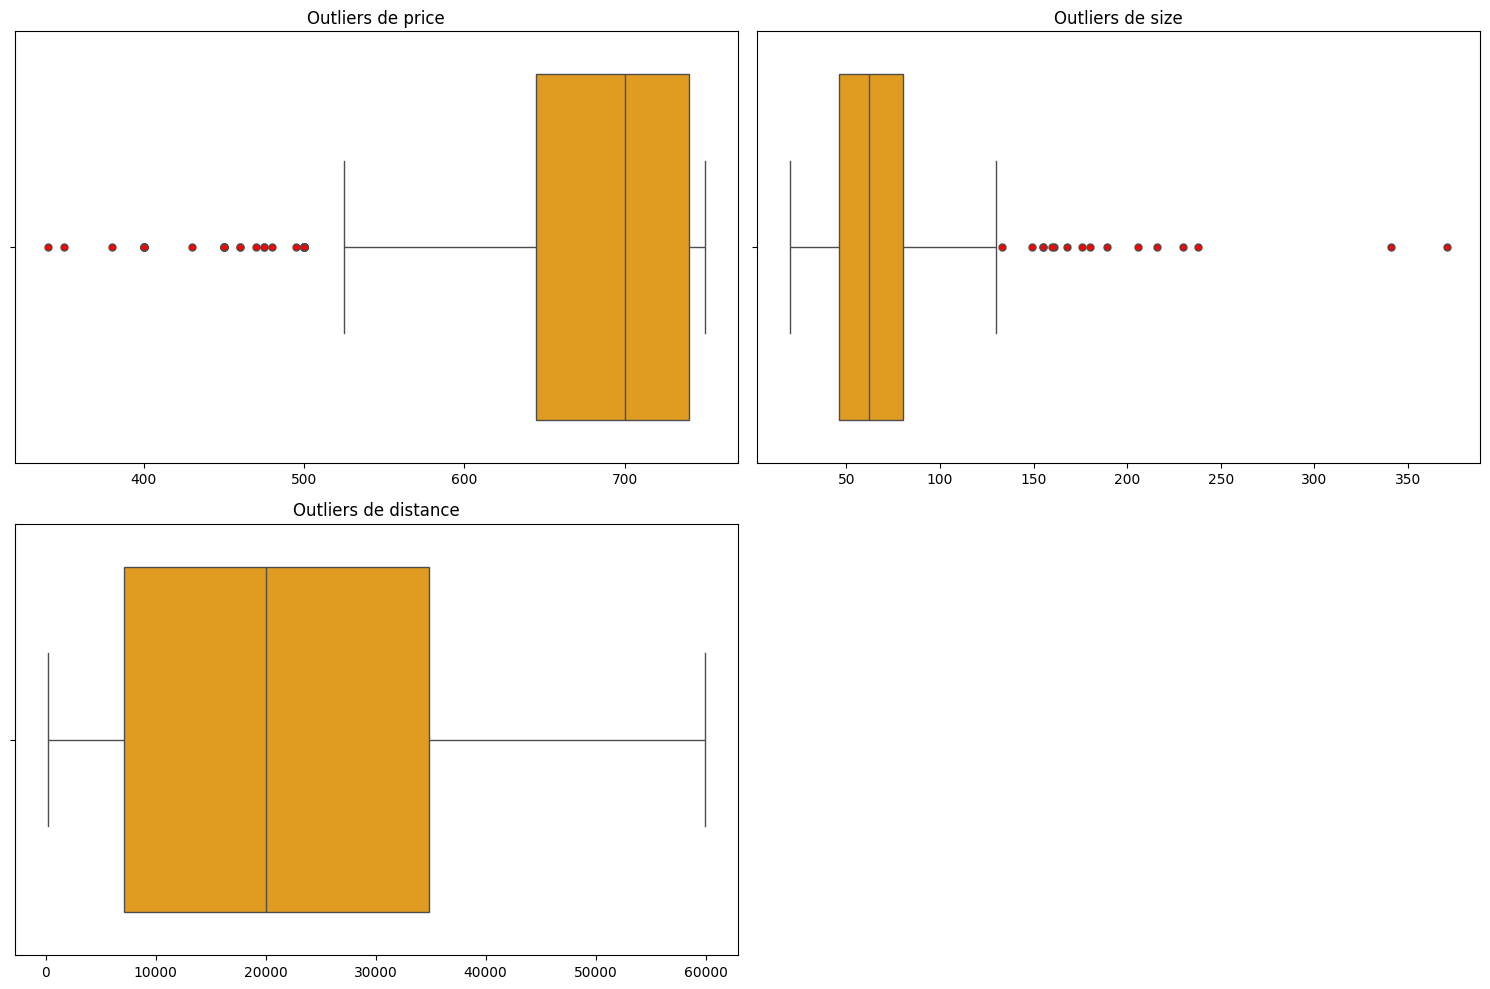

In [35]:
detectar_outliers(df)

### Visualizar correlacion con heatmap


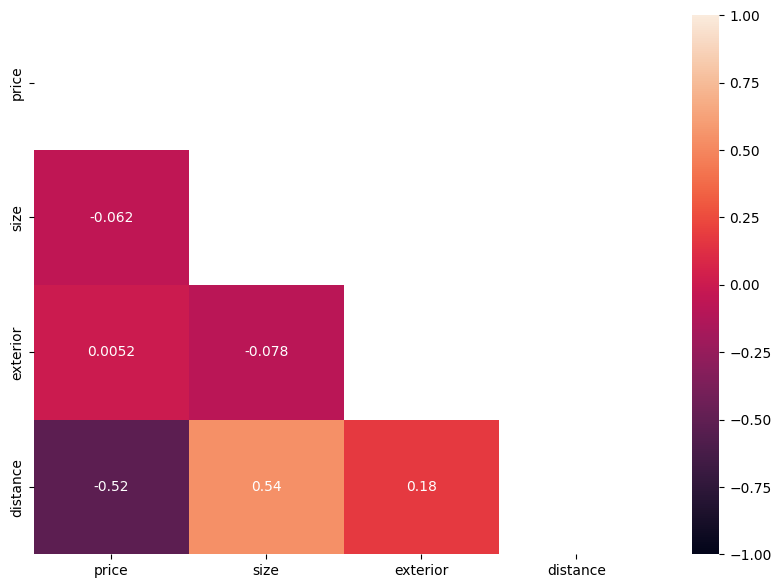

In [36]:
matriz_correlacion(df)

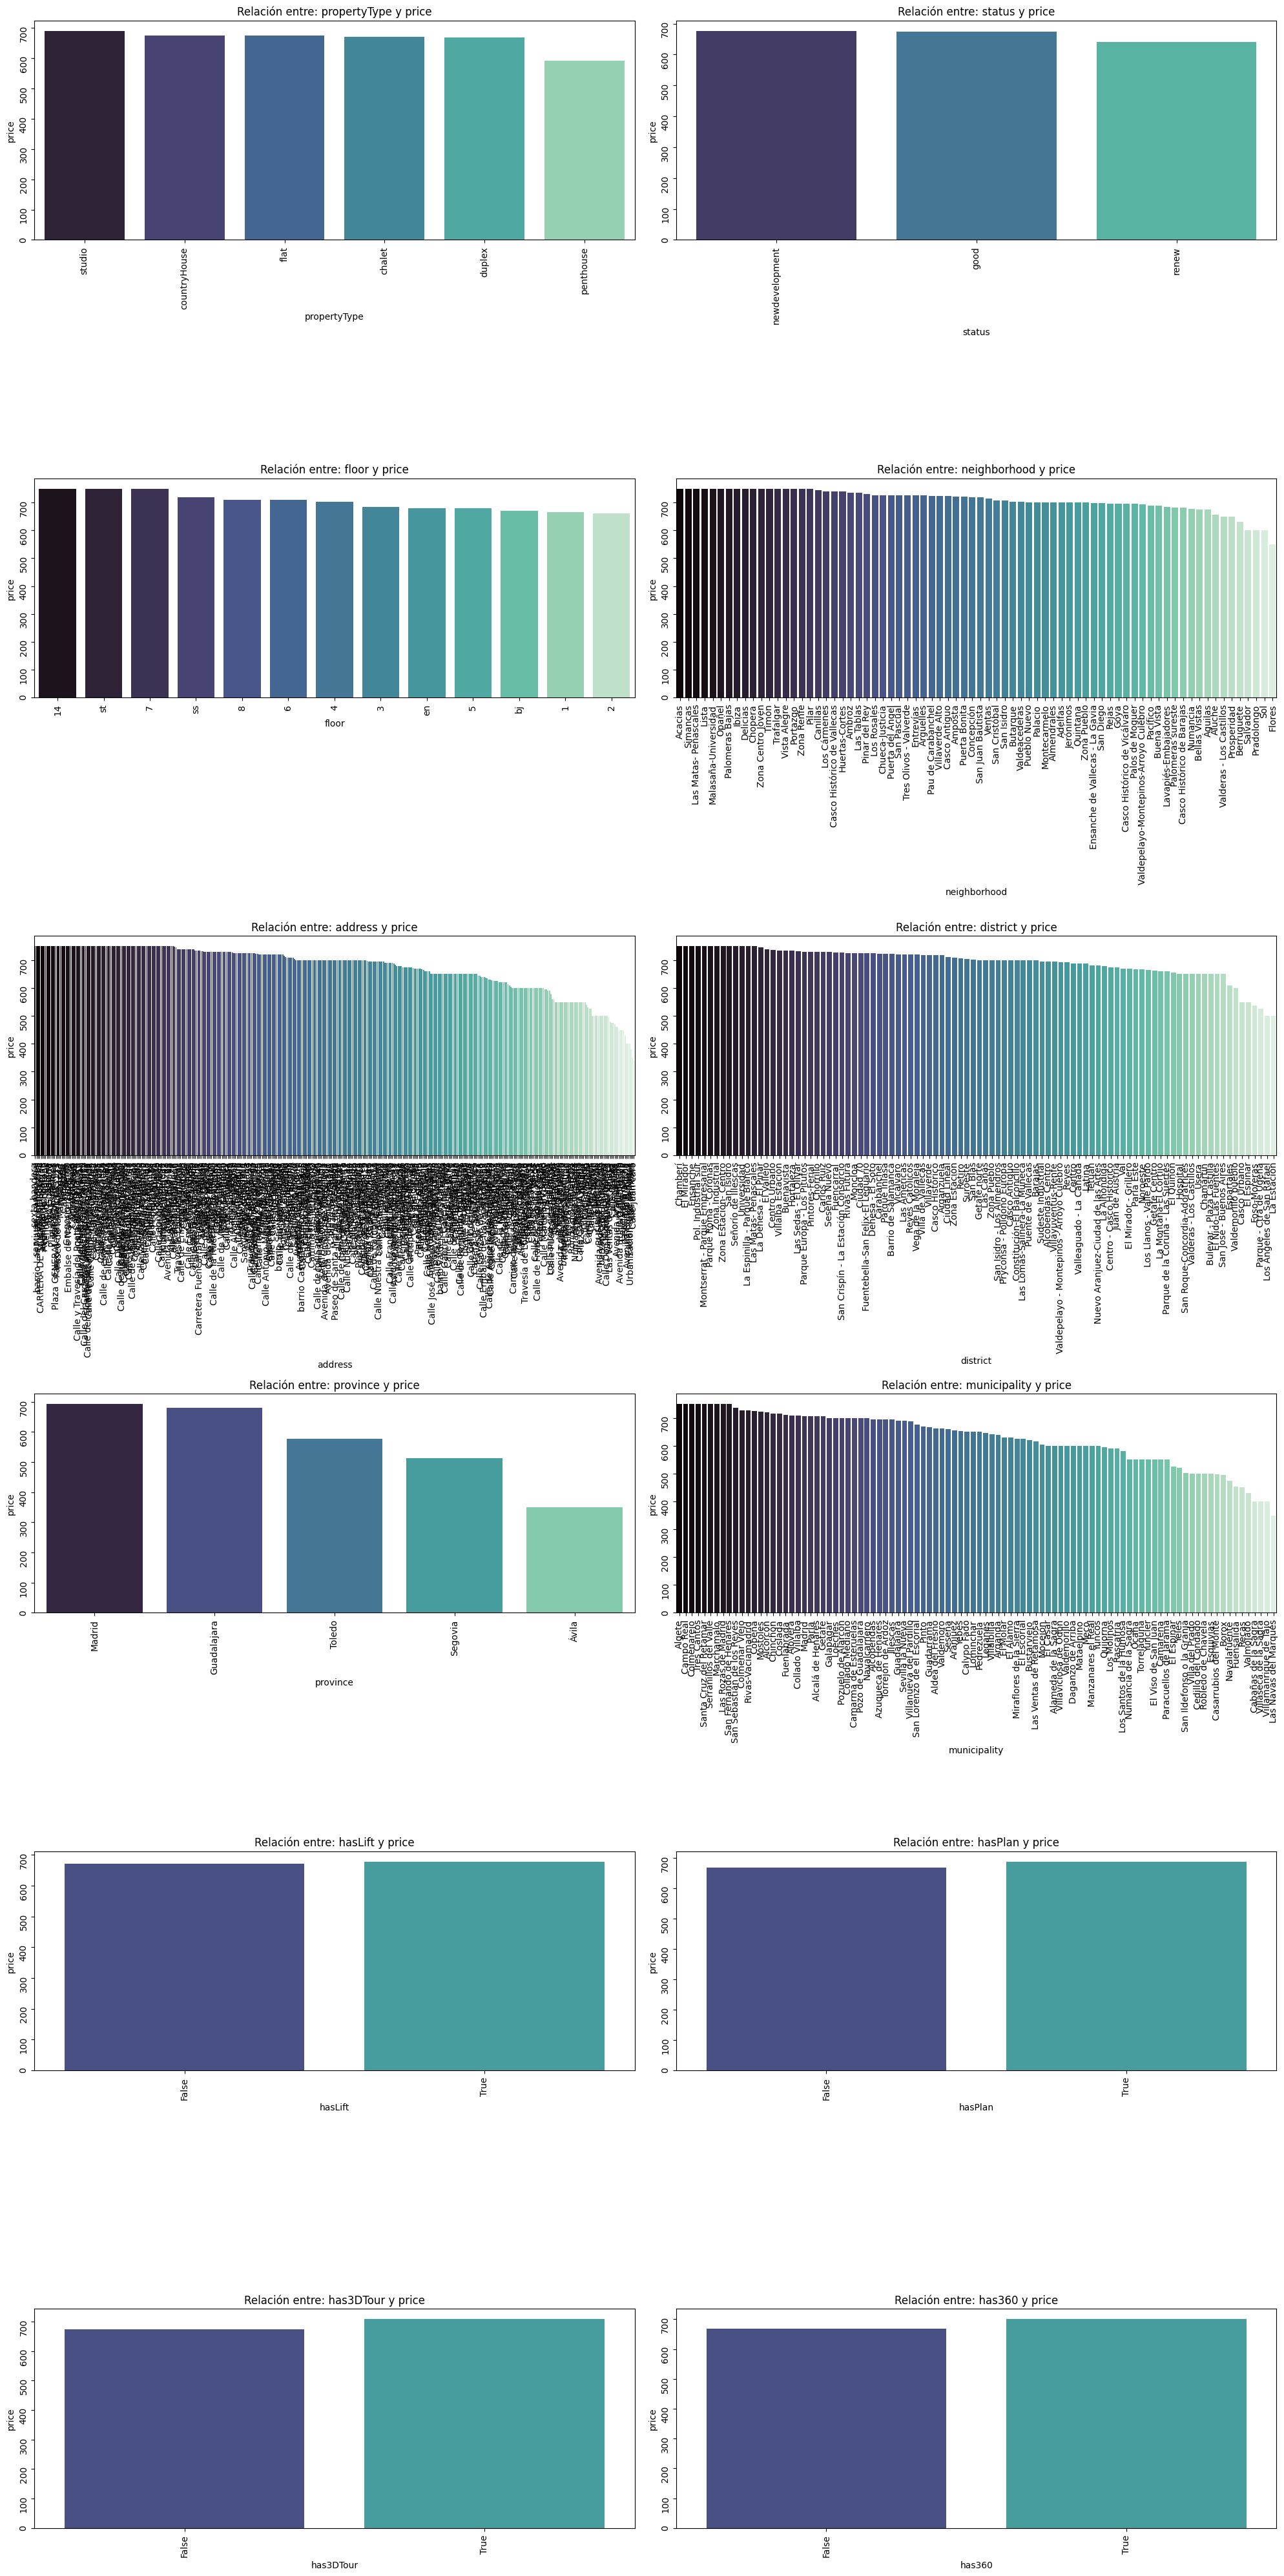

In [37]:
relacion_vr_categoricas(df,"price",grafica_size=(20,40))

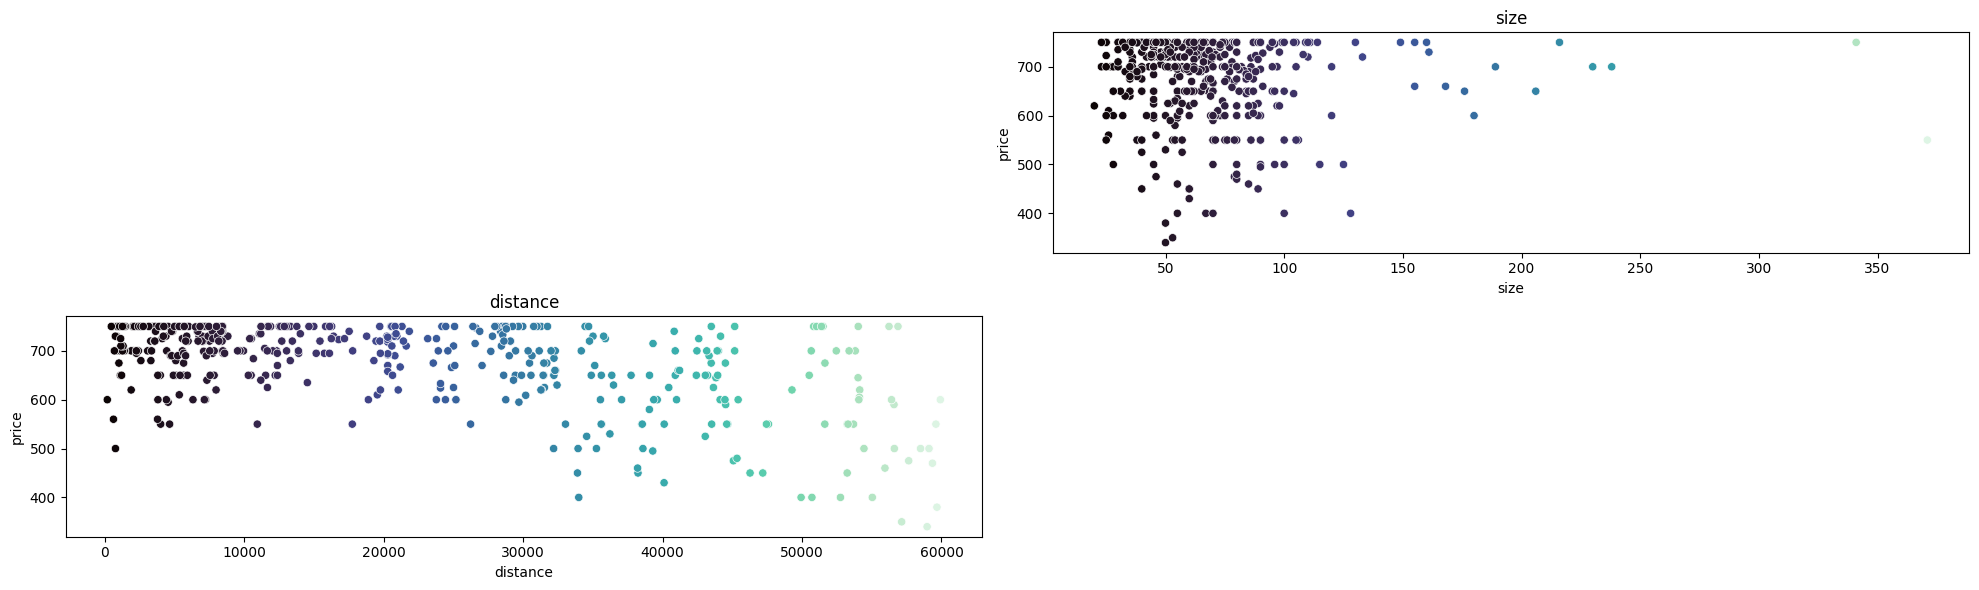

In [38]:
relacion_vr_numericas(df,"price",grafica_size=(20,6))

In [39]:
df.to_csv("../../datos/02_api_rent_limpieza_cols.csv",index=False)